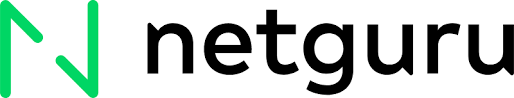
![NLP](https://miro.medium.com/max/3200/1*TURvrYWSTRQLGF6sJ025gw.png)

# Task description

Your task is to use the data to create a model (or models) that is able to determine based on the text, who wrote it and what is the topic. In this case who means:
* What is the gender of the blogger
* What is the age of the blogger
* What is the zodiac sign of the blogger
* What ist the industry (topic) of the blog

# Data
There is one file provided for this task **blogtext.csv**

The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person. Each blogpost is presented as a separate row, with a blogger id# and the blogger’s self-provided gender, age, industry and astrological sign.

Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label urllink.

### Load neccessary libraries and some charts configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# Set the style for all charts
plt.style.use('seaborn-whitegrid')

# Create tailoerd color palette for graphs
colors_palette = [
    '#2C82FF', 
    '#15C2FF',
    '#344C9F',
    '#FFC859',
    '#6500E6',
]

In [2]:
%%time
data_raw = pd.read_csv("../data/blogtext.csv")

Wall time: 8.24 s


In [3]:
data_raw.shape

(681284, 7)

In [4]:
data_raw.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [5]:
data_raw.isna().any()

id        False
gender    False
age       False
topic     False
sign      False
date      False
text      False
dtype: bool

Our data **does not** contain any missing values. 

That's very good sign, we can use **whole dataset** wihtout any data removing (in case we have a lot of data and can sacrifice some rows) or implementing missing values insertion algorithms and techniques (in case we need more data and we cannot afford data removal).

# Columns description

### GENDER

In [6]:
data_raw.gender.nunique(), data_raw.gender.unique()

(2, array(['male', 'female'], dtype=object))

2 unique values for column ``gender``:
* **male**
* **female**

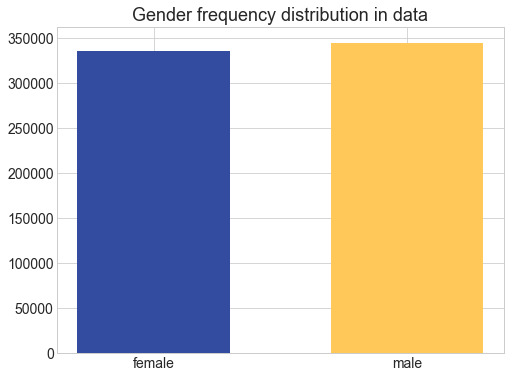

In [7]:
gender_plot = data_raw.groupby('gender').agg({'gender':'count'})
plt.rcParams['figure.figsize'] = (8, 6)

plt.bar(gender_plot.index, gender_plot['gender'], width=0.6, color=colors_palette[2:4])
plt.title('Gender frequency distribution in data', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

The distribution in dataset for column gender is quite balanced

### AGE

In [8]:
data_raw.age.nunique(), data_raw.age.unique()

(26,
 array([15, 33, 14, 25, 17, 23, 37, 26, 24, 27, 45, 34, 41, 44, 16, 39, 35,
        36, 46, 42, 13, 38, 43, 40, 47, 48], dtype=int64))

**26** unique values for column ``age``

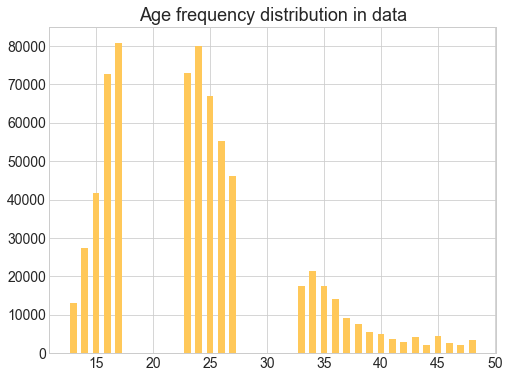

In [9]:
age_plot = data_raw.groupby('age').agg({'age':'count'})
plt.rcParams['figure.figsize'] = (8, 6)

plt.bar(age_plot.index, age_plot['age'], width=0.6, color=colors_palette[3])
plt.title('Age frequency distribution in data', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

**NOTE**

We have some extraordinary missing spans of data, in more complex EDA we should investigate that.

### TOPIC

In [10]:
data_raw.topic.nunique(), data_raw.topic.unique()

(40,
 array(['Student', 'InvestmentBanking', 'indUnk', 'Non-Profit', 'Banking',
        'Education', 'Engineering', 'Science', 'Communications-Media',
        'BusinessServices', 'Sports-Recreation', 'Arts', 'Internet',
        'Museums-Libraries', 'Accounting', 'Technology', 'Law',
        'Consulting', 'Automotive', 'Religion', 'Fashion', 'Publishing',
        'Marketing', 'LawEnforcement-Security', 'HumanResources',
        'Telecommunications', 'Military', 'Government', 'Transportation',
        'Architecture', 'Advertising', 'Agriculture', 'Biotech',
        'RealEstate', 'Manufacturing', 'Construction', 'Chemicals',
        'Maritime', 'Tourism', 'Environment'], dtype=object))

**40** unique values for column ``topic``

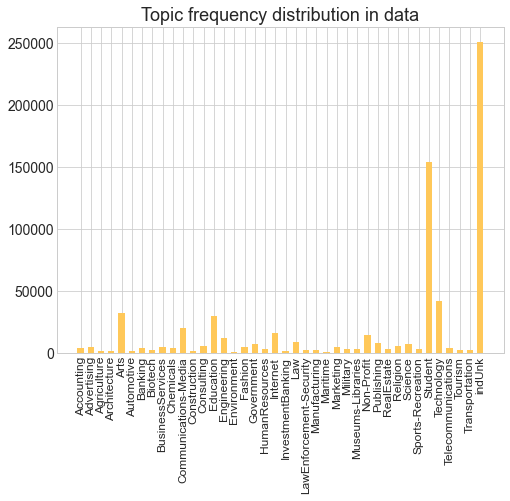

In [11]:
topic_plot = data_raw.groupby('topic').agg({'topic':'count'})
plt.rcParams['figure.figsize'] = (8, 6)

plt.bar(topic_plot.index, topic_plot['topic'], width=0.6, color=colors_palette[3])
plt.title('Topic frequency distribution in data', fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=14)
plt.xticks(topic_plot.index, rotation='vertical', size=12)
plt.show()

* Quite **imbalanced distribution**, may cause some unwanted noise in the training process
* ``indUnk`` as the most frequent value
* ``Student`` as the second frequent value, huge frequency difference between those two class and other classes

**EDIT**

We need to exclude value ``indUnk`` as it is considered as unknown value. Rows containing this value should be **removed from training**.

In [12]:
data_raw[data_raw.topic=='indUnk'].shape

(251015, 7)

### SIGN

In [13]:
data_raw.sign.nunique(), data_raw.sign.unique()

(12,
 array(['Leo', 'Aquarius', 'Aries', 'Capricorn', 'Gemini', 'Cancer',
        'Sagittarius', 'Scorpio', 'Libra', 'Virgo', 'Taurus', 'Pisces'],
       dtype=object))

**12** unique values for column ``sign`` - number of calendar months so the value seems correct

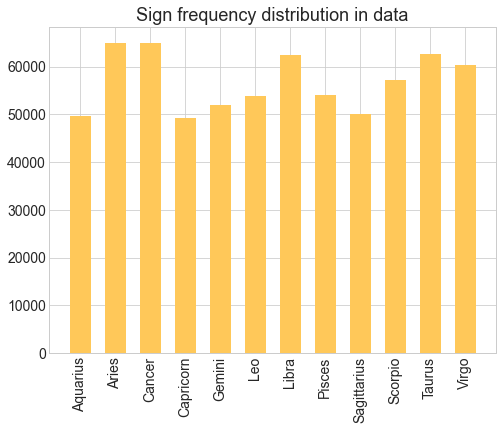

In [14]:
sign_plot = data_raw.groupby('sign').agg({'sign':'count'})
plt.rcParams['figure.figsize'] = (8, 6)

plt.bar(sign_plot.index, sign_plot['sign'], width=0.6, color=colors_palette[3])
plt.title('Sign frequency distribution in data', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation='vertical')
plt.show()

Distribution across classes seems **pretty balanced**, shouldn't be a problem in further analysis.

### QUICK EDA USING TEXTHERO


In [15]:
import texthero as hero

RANDOM_STATE = 420

1. Taking into consideration that this is just a showcase project, I decided not to use the whole dataset to save some time.
2. Preprocessing and training on the whole dataset takes too long on standard PC with 8GB RAM.
3. If we would like to achieve state-of-the-art results for this dataset we should be definetely use the whole dataset (it is almost always recommended to use more data).

In previous part we checked that all of the classes we want to model are quite balanced, due to this we can sample the dataset wihtout any stratification (balancing the class frequency in subsample to represent the balance of the original dataset).

In [16]:
df = data_raw.sample(n=5000,  random_state = RANDOM_STATE).copy()

I decided to use texthero as cleaning pipeline:

The default pipeline for the clean method is the following:

* fillna(s) Replace not assigned values with empty spaces.
* lowercase(s) Lowercase all text.
* remove_digits() Remove all blocks of digits.
* remove_punctuation() Remove all string.punctuation (!"#&'()*+,-./:;<=>?@^_{|}~
* remove_diacritics() Remove all accents from strings.
* remove_stopwords() Remove all stop words.
* remove_whitespace() Remove all white space between words.

In [17]:
%%time

df['cleaned_text'] = (
   df['text']
   .pipe(hero.clean)
)

Wall time: 1.68 s


In [18]:
df.head()

,id,gender,age,topic,sign,date,text,cleaned_text
639736,3550211,female,26,Student,Leo,"09,August,2004",A.J. : What's with you? Yesterday you ...,j yesterday normal today like chinese guy kara...
257640,1934430,male,25,Engineering,Capricorn,"17,March,2004",Happy St. Patrick's Day to on...,happy st patrick day one old irish blessing dr...
571280,3221627,female,25,indUnk,Leo,"07,June,2004",This article was translated b...,article translated good friend nihaya course s...
642265,122217,male,37,indUnk,Leo,"05,March,2003",Pete Taylor died today. For more than 3...,pete taylor died today years voice urllink iow...
42012,888601,female,24,indUnk,Libra,"14,September,2003","OK, I just got back from watching the D...",ok got back watching de la hoya mosley fight e...


In [19]:
df['tf_idf'] = (
   df['cleaned_text']
   .pipe(hero.tfidf)
)

In [20]:
print('Number of unique words in term frequency matrix:', len(df.iloc[0]['tf_idf']))

Number of unique words in term frequency matrix: 44674


### Cleaned text statistics

In [21]:
df['tokens'] = hero.tokenize(df['cleaned_text'])

In [22]:
df['no_tokens'] = df['tokens'].str.len()

In [23]:
mean_len = df['no_tokens'].mean()
median_len = df['no_tokens'].median()

over_128 = df[df['no_tokens']>128].shape[0]
over_256 = df[df['no_tokens']>256].shape[0]
over_512 = df[df['no_tokens']>512].shape[0]

**CLEANING DONE ONCE FOR WHOLE DATASET FOR REFERENCE ONLY, RESULTS BELOW**

Number of rows in input dataframe: 681284 rows

Percent of records with tokens over 128: 25.1%

Percent of records with tokens over 256: 8.5%

Percent of records with tokens over 512: 1.8%

Mean length of record: 102.6 tokens

Median length of record: 58.0 tokens

In [24]:
# Print output
print(f"Number of rows in input dataframe: {df.shape[0]} rows\n")

print(f"Percent of records with tokens over 128: {round(over_128/df.shape[0]*100,1)}%")
print(f"Percent of records with tokens over 256: {round(over_256/df.shape[0]*100,1)}%")
print(f"Percent of records with tokens over 512: {round(over_512/df.shape[0]*100,1)}%\n")

print(f"Mean length of record: {round(mean_len, 1)} tokens")
print(f"Median length of record: {median_len} tokens")

Number of rows in input dataframe: 5000 rows

Percent of records with tokens over 128: 24.7%
Percent of records with tokens over 256: 8.5%
Percent of records with tokens over 512: 1.8%

Mean length of record: 101.3 tokens
Median length of record: 57.0 tokens


Let's **save** the cleaned and sampled dataset for future

In [25]:
# Select only columns we want to save

df[['id', 'gender', 'age', 'topic', 'sign', 'date', 'cleaned_text']].\
to_csv('../data/blog_autorship_clean_sample5000.csv')

### Create datasets for training

In [26]:
RANDOM_STATE = 420

In [27]:
data_raw = pd.read_csv("../data/blogtext.csv")

As presented in EDA we need to delete the ``indUnk`` values from our dataset for topic column

In [28]:
data_raw = data_raw[data_raw.topic!='indUnk']

In [29]:
data_raw.shape

# we delete over 200k rows

(430269, 7)

Check if all data in age column is a real integer
(could be checked with .dtypes but not always gets it right)

In [30]:
for i in data_raw.age:
    if not isinstance(i, int):
        print(type(i))

Create buckets for ``age`` to make only 3 classes for ``age`` column

In [31]:
def age_buckets(age):
    if age <= 20:
        return '<20'
    elif age > 20 and age <= 25:
        return '20-25'
    elif age > 25:
        return '>25'

In [32]:
data_raw.age = data_raw.age.apply(age_buckets)

<AxesSubplot:xlabel='age', ylabel='count'>

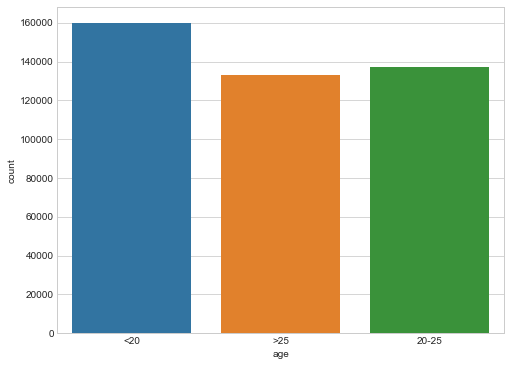

In [33]:
sns.countplot(x=data_raw.age)

Still **balanced** after our bracket assignment

Define **classes** (subtasks for our training pipeline)

In [34]:
classes = ['gender', 'age', 'sign', 'topic']

In [35]:
max_n_unique = 0

for class_name in classes:
    n_unique = data_raw[class_name].nunique()
    
    if n_unique > max_n_unique:
        max_n_unique = n_unique
    print(f"For class {class_name} we have {n_unique} unique values")
    
print(f"\nMaximum number of classes for our tasks is: {max_n_unique}")

For class gender we have 2 unique values
For class age we have 3 unique values
For class sign we have 12 unique values
For class topic we have 39 unique values

Maximum number of classes for our tasks is: 39


So we would take **250 of rows for each class** to balance the dataset avoiding the situation we create a dataset with unbalanced classess.

In [36]:
ROWS_PER_CLASS = 250

In [37]:
for class_name in classes:
    
    # Sample indexes
    ids = []    
    for unique_val in data_raw[class_name].unique():
        temp = data_raw[data_raw[class_name] == unique_val]
        ids.extend(temp.sample(n=ROWS_PER_CLASS, random_state = RANDOM_STATE).index.to_list())
    
    # Filter raw data with sampled indexes
    df = data_raw.loc[ids]
    df = df.reset_index(drop=True)
    
    # Clean text with texthero library
    df['cleaned_text'] = (
                           df['text']
                           .pipe(hero.clean)
                        )
    
    # Only required columns
    df = df[['cleaned_text', class_name]]
    
    # Drop missing rows
    df = df.dropna()
    
    # Select only columns we want to save
    df.to_csv(f'../data/training/{class_name}_blog_autorship_clean_sample.csv', index=False)

## Summary

1. Short EDA was conducted, some observation were made, we are able to conduct some experiments having in mind all of the findings.
2. Clenead data using super fast library ``texthero``.
3. Files with data for each task provided.